### 1️⃣ Load Required Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score
)

pd.set_option('display.max_columns', None)

### 2️⃣ Load Cleaned Dataset

In [2]:
df = pd.read_csv("cleaned_train_data.csv")
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,1,22.0,1,0,7.2500,2,2
1,1,1,0,38.0,1,0,65.6344,0,2
2,1,3,0,26.0,0,0,7.9250,2,1
3,1,1,0,35.0,1,0,53.1000,2,2
4,0,3,1,35.0,0,0,8.0500,2,1


### 3️⃣ Define Target & Features

In [3]:
X = df.drop(['Fare'], axis=1)
y = df['Fare']

### 4️⃣ Train-Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### 5️⃣ Feature Scaling (Required for Some Models)

In [6]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 6️⃣ Reusable Regression Evaluation Function

In [7]:
def evaluate_regression(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    return {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R2": r2_score(y_test, y_pred)
    }

### 7️⃣ Build & Evaluate Regression Models

#### 🔹 7.1 Linear Regression (Baseline)

In [8]:
lr = LinearRegression()

lr_results = evaluate_regression(
    lr, X_train_scaled, X_test_scaled, y_train, y_test
)
lr_results

{'MAE': 7.947412516171251,
 'MSE': 124.0971615861383,
 'RMSE': 11.139890555393185,
 'R2': 0.7003359918556866}

#### 🔹 7.2 Ridge Regression (L2 Regularization)

In [9]:
ridge = Ridge(alpha=1.0)

ridge_results = evaluate_regression(
    ridge, X_train_scaled, X_test_scaled, y_train, y_test
)
ridge_results

{'MAE': 7.999219178430107,
 'MSE': 124.33178746002999,
 'RMSE': 11.150416470250336,
 'R2': 0.6997694282946343}

#### 🔹 7.3 Lasso Regression (L1 Regularization) 

In [10]:
lasso = Lasso(alpha=0.01)

lasso_results = evaluate_regression(
    lasso, X_train_scaled, X_test_scaled, y_train, y_test
)
lasso_results

{'MAE': 7.996217537157381,
 'MSE': 124.35316342316251,
 'RMSE': 11.151374956621382,
 'R2': 0.6997178106209634}

#### 🔹 7.4 Elastic Net

In [11]:
elastic = ElasticNet(alpha=0.01, l1_ratio=0.5)

elastic_results = evaluate_regression(
    elastic, X_train_scaled, X_test_scaled, y_train, y_test
)
elastic_results

{'MAE': 7.99256210641239,
 'MSE': 124.23758947907903,
 'RMSE': 11.14619170295752,
 'R2': 0.6999968931630491}

#### 🔹 7.5 Decision Tree Regressor

In [12]:
dt = DecisionTreeRegressor(
    max_depth=6,
    min_samples_split=10,
    random_state=42
)

dt_results = evaluate_regression(
    dt, X_train, X_test, y_train, y_test
)
dt_results

{'MAE': 5.352885145687609,
 'MSE': 98.5472141880006,
 'RMSE': 9.927094952099562,
 'R2': 0.7620328070555078}

#### 🔹 7.6 Random Forest Regressor

In [13]:
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=8,
    random_state=42
)

rf_results = evaluate_regression(
    rf, X_train, X_test, y_train, y_test
)
rf_results

{'MAE': 4.693492499379054,
 'MSE': 81.48071918990189,
 'RMSE': 9.026667114162452,
 'R2': 0.8032441791025248}

#### 🔹 7.7 Gradient Boosting Regressor

In [14]:
gbr = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    random_state=42
)

gbr_results = evaluate_regression(
    gbr, X_train, X_test, y_train, y_test
)
gbr_results

{'MAE': 5.388618110403782,
 'MSE': 94.88962441840141,
 'RMSE': 9.741130551347796,
 'R2': 0.7708649833639477}

#### 🔹 7.8 Support Vector Regressor (SVR)

In [15]:
svr = SVR(kernel='rbf', C=100)

svr_results = evaluate_regression(
    svr, X_train_scaled, X_test_scaled, y_train, y_test
)
svr_results

{'MAE': 4.995705792147945,
 'MSE': 103.93267992921886,
 'RMSE': 10.194737854855262,
 'R2': 0.7490282368533348}

#### 🔹 7.9 K-Nearest Neighbors Regressor

In [16]:
knn = KNeighborsRegressor(n_neighbors=7)

knn_results = evaluate_regression(
    knn, X_train_scaled, X_test_scaled, y_train, y_test
)
knn_results

{'MAE': 5.905839026336791,
 'MSE': 102.21260589937863,
 'RMSE': 10.110025019720704,
 'R2': 0.753181790983814}

### 8️⃣ Compare All Regression Models

In [17]:
results_df = pd.DataFrame({
    "Linear Regression": lr_results,
    "Ridge": ridge_results,
    "Lasso": lasso_results,
    "ElasticNet": elastic_results,
    "Decision Tree": dt_results,
    "Random Forest": rf_results,
    "Gradient Boosting": gbr_results,
    "SVR": svr_results,
    "KNN": knn_results
}).T

results_df

,MAE,MSE,RMSE,R2
Linear Regression,7.947413,124.097162,11.139891,0.700336
Ridge,7.999219,124.331787,11.150416,0.699769
Lasso,7.996218,124.353163,11.151375,0.699718
ElasticNet,7.992562,124.237589,11.146192,0.699997
Decision Tree,5.352885,98.547214,9.927095,0.762033
Random Forest,4.693492,81.480719,9.026667,0.803244
Gradient Boosting,5.388618,94.889624,9.741131,0.770865
SVR,4.995706,103.932680,10.194738,0.749028
KNN,5.905839,102.212606,10.110025,0.753182


### 9️⃣ Visual Comparison

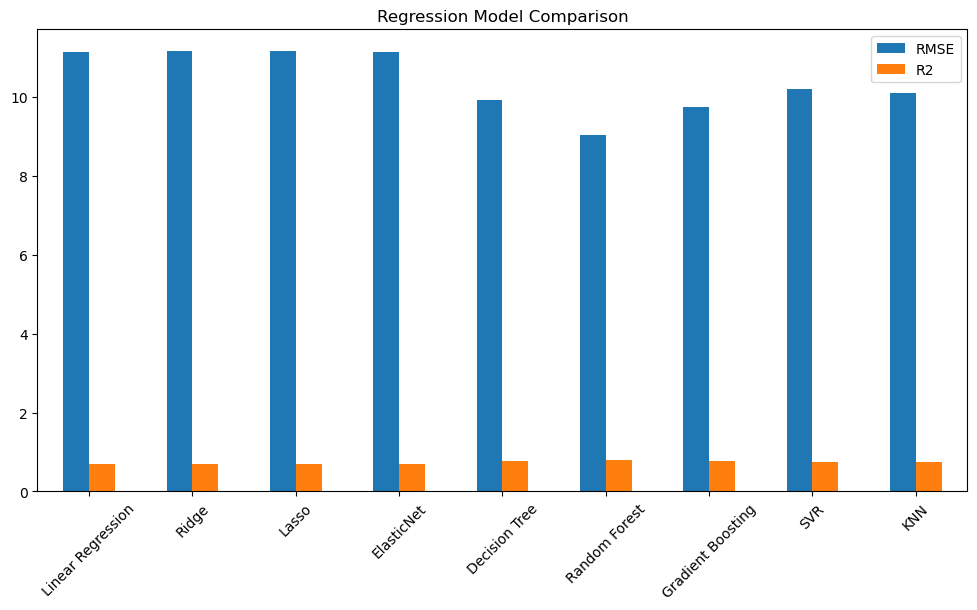

In [18]:
results_df[['RMSE', 'R2']].plot(kind='bar', figsize=(12,6))
plt.title("Regression Model Comparison")
plt.xticks(rotation=45)
plt.show()

### 🔟 Cross-Validation (Best Practice)

In [19]:
cv_scores = cross_val_score(
    rf, X_train, y_train, cv=5, scoring='r2'
)

print("Random Forest CV R2:", cv_scores.mean())

Random Forest CV R2: 0.7936555724853651


### 1️⃣1️⃣ Feature Importance (Tree-Based Models)

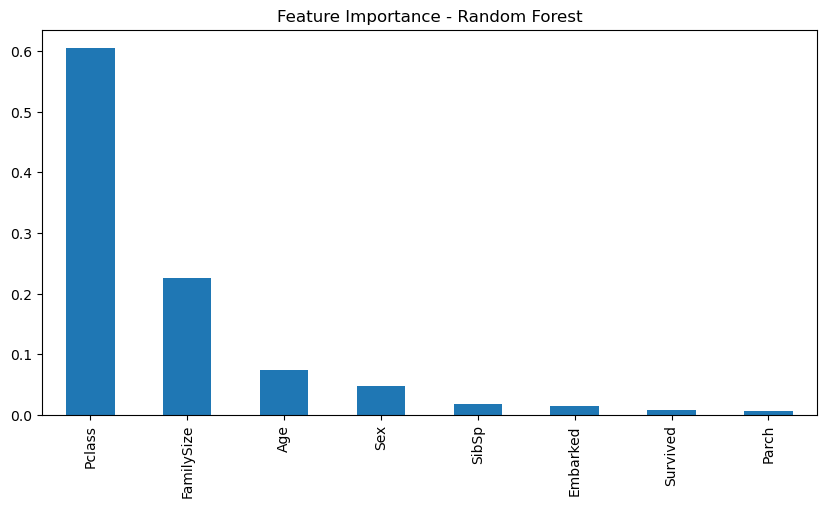

In [20]:
feature_importance = pd.Series(
    rf.feature_importances_, index=X.columns
).sort_values(ascending=False)

feature_importance.plot(kind='bar', figsize=(10,5))
plt.title("Feature Importance - Random Forest")
plt.show()

### 1️⃣2️⃣ Final Observations (Markdown Section)
#### ✅ Regression Model Summary
- Linear models provided a strong baseline
- Regularization (Ridge, Lasso) reduced overfitting
- Tree-based models significantly improved performance
- Random Forest & Gradient Boosting performed best

#### 🏆 Best Regression Model
Random Forest Regressor due to lowest RMSE and highest R² score